### Introduction

The Dataset consists of 1000+ records of product data from Amazon e-commerce site. 
- The objective is to do a category-wise analysis and gather insights such as the product categories and subcategories  with highest sales, dicounts, etc. 
- As part of EDA, the task is to analyze relationships between the variables like price and rating.
- Dataset link: https://www.kaggle.com/datasets/karkavelrajaj/amazon-sales-dataset

In [24]:
# importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
# loading date from csv
amz_df = pd.read_csv(r'C:\Users\ARAMMOHA\Desktop\Learning_2023\Snipe_tech_docs\amazon.csv')

In [26]:
#checking the dimensions
amz_df.shape

(1465, 16)

In [27]:
# checking data sample
amz_df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,"Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,₹399,"₹1,099",64%,4.2,"24,269","High Compatibility : Compatible With iPhone 12, 11, X/XsMax/Xr ,iPhone 8/8 Plus,iPhone 7/7 Plus,iPhone 6s/6s Plus,iPhone 6/6 Plus,iPhone 5/5s/5c/se,iPad Pro,iPad Air 1/2,iPad mini 1/2/3,iPod nano7,iPod touch and more apple devices.|Fast Charge&Data Sync : It can charge and sync simultaneously at a rapid speed, Compatible with any charging adaptor, multi-port charging station or power bank.|Durability : Durable nylon braided design with premium aluminum housing and toughened nylon fiber wound tightly around the cord lending it superior durability and adding a bit to its flexibility.|High Security Level : It is designed to fully protect your device from damaging excessive current.Copper core thick+Multilayer shielding, Anti-interference, Protective circuit equipment.|WARRANTY: 12 months warranty and friendly customer services, ensures the long-time enjoyment of your purchase. If you meet any question or problem, please don't hesitate to contact us.","AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBBSNLYT3ONILA,AHCTC6ULH4XB6YHDY6PCH2R772LQ,AGYHHIERNXKA6P5T7CZLXKVPT7IQ,AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q,AENGU523SXMOS7JPDTW52PNNVWGQ,AEQJHCVTNINBS4FKTBGQRQTGTE5Q,AFC3FFC5PKFF5PMA52S3VCHOZ5FQ","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jaspreet singh,Khaja moin,Anand,S.ARUMUGAM","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1KD19VHEDV0OR,R3C02RMYQMK6FC,R39GQRVBUZBWGY,R2K9EDOE15QIRJ,R3OI7YT648TL8I","Satisfied,Charging is really fast,Value for money,Product review,Good quality,Good product,Good Product,As of now seems good","Looks durable Charging is fine tooNo complains,Charging is really fast, good product.,Till now satisfied with the quality.,This is a good product . The charging speed is slower than the original iPhone cable,Good quality, would recommend,https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/81---F1ZgHL._SY88.jpg,Product had worked well till date and was having no issue.Cable is also sturdy enough...Have asked for replacement and company is doing the same...,Value for money",https://m.media-amazon.com/images/W/WEBP_402378-T1/images/I/51UsScvHQNL._SX300_SY300_QL70_FMwebp_.jpg,https://www.amazon.in/Wayona-Braided-WN3LG1-Syncing-Charging/dp/B07JW9H4J1/ref=sr_1_1?qid=1672909124&s=electronics&sr=1-1
1,B098NS6PVG,"Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be it an android smartphone (Mi, Samsung, Oppo, Vivo, Realme, OnePlus, etc), tablet, laptop (Macbook, Chromebook, etc)|Supports Quick Charging (2.0/3.0)|Unbreakable – Made of special braided outer with rugged interior bindings, it is ultra-durable cable that won’t be affected by daily rough usage|Ideal Length – It has ideal length of 1.5 meters which is neither too short like your typical 1meter cable or too long like a 2meters cable|Supports maximum 3A fast charging and 480 Mbps data transfer speed|6 months manufacturer warranty from the date of purchase","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBXNGXZJT525AQ,AHONIZU3ICIEHQIGQ6R2VFRSBXOQ,AFPHD2CRPDZMWMBL7WXRSVYWS5JA,AEZ346GX3HJ4O4XNRPHCNHXQURMQ,AEPSWFPNECKO34PUC7I56ITGXR6Q,AHWVEHR5DYLVFTO2KF3IZATFQSWQ,AH4QT33M55677I7ISQOAKEQWACYQ","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Placeholder,BharanI,sonia,Niam","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1W

In [28]:
# checking for duplicate enteries
amz_df.duplicated().sum()

0

As there are no duplicate values in the data, we can proceed with data cleaning and formatting

In [29]:
# getting all column names
amz_df.columns


Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')

Select columns required for data analysis

In [30]:
df = amz_df[['product_id','product_name','category','discounted_price','actual_price','discount_percentage',
            'rating','rating_count','product_link']]

In [31]:
# check for null values in the filtered dataset
df.isnull().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
product_link           0
dtype: int64

In [32]:
# looking into rows with null values
df[df.rating_count.isnull()]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,product_link
282,B0B94JPY2N,"Amazon Brand - Solimo 65W Fast Charging Braided Type C to C Data Cable | Suitable For All Supported Mobile Phones (1 Meter, Black)",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,₹199,₹999,80%,3.0,NaN,https://www.amazon.in/Amazon-Brand-Charging-Suitable-Supported/dp/B0B94JPY2N/ref=sr_1_444?qid=1672909146&s=electronics&sr=1-444
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple MFi Certified] Lightning to Type C Fast Charging Cord Compatible with iPhone 14/13/13 pro/Max/12/11/X/XS/XR/8, Supports Power Delivery - White",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,₹249,₹999,75%,5.0,NaN,https://www.amazon.in/REDTECH-Lightning-Certified-Charging-Compatible/dp/B0BQRJ3C47/ref=sr_1_491?qid=1672909149&s=electronics&sr=1-491


In [33]:
# we need to view the entire content of a cell in a pandas DataFrame without truncation
pd.options.display.max_colwidth = -1

<ipython-input-33-ed39aae296e7>:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.options.display.max_colwidth = -1


In [34]:
df.loc[df['rating_count'].isna(),'product_name']

282    Amazon Brand - Solimo 65W Fast Charging Braided Type C to C Data Cable | Suitable For All Supported Mobile Phones (1 Meter, Black)                                                           
324    REDTECH USB-C to Lightning Cable 3.3FT, [Apple MFi Certified] Lightning to Type C Fast Charging Cord Compatible with iPhone 14/13/13 pro/Max/12/11/X/XS/XR/8, Supports Power Delivery - White
Name: product_name, dtype: object



#### The product links given doesn't work, so we search with product ids and get the ratings. But we also need to check if there are multiple products with same id. 




In [35]:
df[df.product_id == 'B0B94JPY2N']

# there is only one row

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,product_link
282,B0B94JPY2N,"Amazon Brand - Solimo 65W Fast Charging Braided Type C to C Data Cable | Suitable For All Supported Mobile Phones (1 Meter, Black)",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,₹199,₹999,80%,3.0,NaN,https://www.amazon.in/Amazon-Brand-Charging-Suitable-Supported/dp/B0B94JPY2N/ref=sr_1_444?qid=1672909146&s=electronics&sr=1-444


In [36]:
df[df.product_id == 'B0BQRJ3C47']

# again there is only single row

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,product_link
324,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple MFi Certified] Lightning to Type C Fast Charging Cord Compatible with iPhone 14/13/13 pro/Max/12/11/X/XS/XR/8, Supports Power Delivery - White",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,₹249,₹999,75%,5.0,NaN,https://www.amazon.in/REDTECH-Lightning-Certified-Charging-Compatible/dp/B0BQRJ3C47/ref=sr_1_491?qid=1672909149&s=electronics&sr=1-491


#### Rating count from amazon site:

- B0B94JPY2N: 19
- B0BQRJ3C47/: No data available, so delete this row



In [37]:
# upating rating count for row index 282
df.loc[282,'rating_count'] = '19'

C:\Users\ARAMMOHA\anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\ARAMMOHA\anaconda3\lib\site-packages\pandas\core\indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)


In [38]:
df.loc[282]
# checking the value

product_id             B0B94JPY2N                                                                                                                        
product_name           Amazon Brand - Solimo 65W Fast Charging Braided Type C to C Data Cable | Suitable For All Supported Mobile Phones (1 Meter, Black)
category               Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables                                                 
discounted_price       ₹199                                                                                                                              
actual_price           ₹999                                                                                                                              
discount_percentage    80%                                                                                                                               
rating                 3.0                                                  

In [39]:
df.shape
# we have 1465 row

(1465, 9)

In [40]:
df = df[~df.rating_count.isnull()]
# get all rows except the ones with null values

In [41]:
df.shape
# check count again

(1464, 9)

In [42]:
df.isnull().sum()
# no null values in df

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
product_link           0
dtype: int64

In [43]:
df.dtypes

product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
product_link           object
dtype: object

 
 
 For descriptive analysis we need to convert price, rating, and percentage columns to float

In [44]:
# removing special charactes at one go

characters_remove = [',','₹','%']
columns = ['discounted_price','actual_price','discount_percentage','rating_count']
for ch in characters_remove:
    for cl in columns:
        df[cl] = df[cl].str.replace(ch,'')

#changetype now
for cl in columns:
    df[cl] = df[cl].astype('float64')

In [45]:
# check datatype

df.dtypes

product_id             object 
product_name           object 
category               object 
discounted_price       float64
actual_price           float64
discount_percentage    float64
rating                 object 
rating_count           float64
product_link           object 
dtype: object

In [46]:
# convert rating column into float
df['rating'] = df['rating'].astype('float64')

ValueError: could not convert string to float: '|'

#### From the error we find that rating data has pipe symbol

In [47]:
df.rating.str.contains('|',regex=False).value_counts()

# there is one row with pipe symbol

False    1463
True     1   
Name: rating, dtype: int64

In [ ]:
# finding the odd row with | symbol
df.query('rating == "|"')

In [48]:
# We find the rating from Amazon site.
# replacing pipe symbol with 4.0 and changing column to float simultaneously

df['rating'] = df['rating'].str.replace('|', '4.0').astype('float64')

<ipython-input-48-2205118f02c2>:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  df['rating'] = df['rating'].str.replace('|', '4.0').astype('float64')


In [49]:
# final dtype list
df.dtypes

product_id             object 
product_name           object 
category               object 
discounted_price       float64
actual_price           float64
discount_percentage    float64
rating                 float64
rating_count           float64
product_link           object 
dtype: object

In [50]:
# After converting data types use pandas profiling
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='output_amazon.html')

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\ARAMMOHA\anaconda3\lib\site-packages\pandas_profiling\visualisation\plot.py:154: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdBu"))
  cmap.set_bad(cmap_bad)


Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]



#### Formatting category column
- category is represented as hierarchy and is separated by | symbol
- taking first two levels for analysis


In [ ]:
# create temp dataframe for splitting category
s1 = df['category'].str.split('|', expand=True)

In [ ]:
s1.head(4)

In [ ]:
s1[0].value_counts()
# These are the main product division

In [ ]:
# insering column at position 2, after product id and product name
df.insert(loc=2, column='main_category', value=s1[0])

In [ ]:
df.head(2)

In [ ]:
# insering column at position 3, 
df.insert(loc=3, column='subcategory', value=s1[1])

In [ ]:
df.head(2)

In [ ]:
# dropping category column
df.drop(columns= ['category'], inplace=True)

In [ ]:
df.columns

In [ ]:
# string formatting for new columns
df['main_category'] = df['main_category'].str.replace('&',' & ')
df['subcategory'] = df['subcategory'].str.replace('&',' & ')



#### Product category with maximum products

In [ ]:
df['main_category'].value_counts().head(3)

In [ ]:
# A graph to represent sales in product category

df['main_category'].value_counts().sort_values().plot(kind='barh', figsize =(10, 4))

plt.title("Products Sold per Category", fontweight='bold')
plt.xlabel("No. of Products", fontweight='bold')



#### Check the subcategories 
- with each main product category 
- get their count

In [ ]:
# use pivot to see number of products in each subcategory
to_pivot = df[['main_category','subcategory','product_id']]

pivot_data = pd.pivot_table(to_pivot,index=['main_category','subcategory'],aggfunc='count')

pivot_data



####  Rating statistics of products in  each main category



In [ ]:
# get a overview of rating for every main category
df.groupby('main_category').rating.describe()

- from above summary we can see that rating is maximum for computers & accessories
  and minimum in home & kitchen
- office products have the highest average ratings of 4.309677
- it also gives the count under each category, count is highest for Electronics

In [ ]:
# a box plot depicting the variations in rating for each category
plt.figure(figsize=(12,6))
sns.set(style = 'whitegrid')
sns.boxplot(data = df, y = 'main_category', x= 'rating')

# to give title use .set after graph
#sns.boxplot(data = df, y = 'main_category', x= 'rating').set(title='Rating variations')

#### Discount Percentage and Discount
- Top 5 expensive and cheapest products after discount
- To find most discounted categories 
- find relationship between rating and price


In [ ]:
# Top 5 most expensive product after discount
df[['product_name','discounted_price']].sort_values('discounted_price',ascending=False).head(5)

# for cheapest products do ascending=True

In [ ]:
# same result via graph
plt.figure(figsize=(10,6))
sns.set(style = 'whitegrid')
sns.barplot(data=df.sort_values('discounted_price',ascending=False).head(5),
            x='discounted_price', y='product_name')

In [ ]:
# Most discounted categories
df.groupby('main_category').agg({'discount_percentage':'max'}).sort_values('discount_percentage',ascending=False)

#### We can infer that th top 4 most discounted categories have the highest review count/sales.

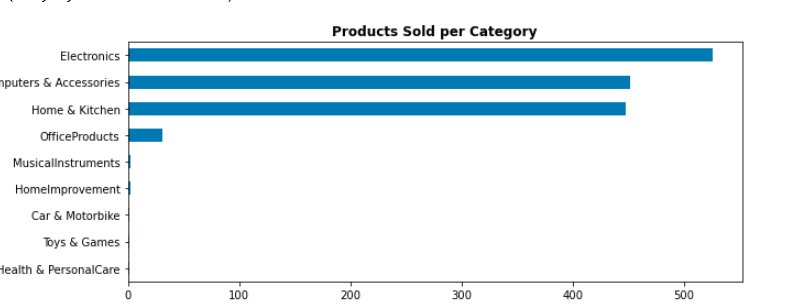

In [ ]:
# comparing rating and price
plt.scatter(df['rating'],df['discounted_price'])

plt.xlabel("Product Rating")
plt.ylabel("Product Price")

#we see that the variables do not have significant correlation.

In [ ]:
# Finding correlation between the desired variables
reldata = df[['main_category','discounted_price','actual_price','discount_percentage',
            'rating','rating_count']].copy()
corr = reldata.corr()
sns.heatmap(corr, annot = True)



From the heatmap we infer that there is a positive correlation between actual price and discounted price. 